# Raw_Reviews Data Analysis
By Shuyan Liu (shuyanliu1108@gmail.com)

# Table of Contents
1. [Data Overview](#data-overview)
2. [Exploratory Data Analysis](#EDA)
3. [Data Preprocessing](#DP)
4. [Sentiment Analysis](#SA)
5. [Rating Based NLP Analysis](#NLP)
6. [Conclusion](#Conclusion)

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the dataset

df = pd.read_csv('Raw_Reviews.csv')


In [3]:
df.head(10)

,Product_ID,Age,Title,Text_Review,Rating,Type
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,Tops
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,Tops
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,Dresses


In [4]:
df.dtypes

Product_ID      int64
Age             int64
Title          object
Text_Review    object
Rating          int64
Type           object
dtype: object

In [5]:
# Check missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product_ID   23486 non-null  int64 
 1   Age          23486 non-null  int64 
 2   Title        19676 non-null  object
 3   Text_Review  22641 non-null  object
 4   Rating       23486 non-null  int64 
 5   Type         23472 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.1+ MB
None
Product_ID        0
Age               0
Title          3810
Text_Review     845
Rating            0
Type             14
dtype: int64


In [6]:
df.describe()

,Product_ID,Age,Rating
count,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032
std,203.298980,12.279544,1.110031
min,0.000000,18.000000,1.000000
25%,861.000000,34.000000,4.000000
50%,936.000000,41.000000,5.000000
75%,1078.000000,52.000000,5.000000
max,1205.000000,99.000000,5.000000


<a id='data-overview'></a>
### Data Overview

The dataset has **23,486 entries** with **6 columns**:

- **Product_ID**: *Product identifier* (`int`)
- **Age**: *Age of the customer* (`int`)
- **Title**: *Title of the reviews* (`string`)
- **Text_Review**: *The text of the review* (`string`)
- **Rating**: *Numerical rating from 1-5* (`int`)
- **Type**: *Product category* (`string`)

#### Missing Data

There are some missing values in the `Title`, `Text_Review`, `Type`

Handling of Missing Values:

- **`Title`**: `Title` will not affect our futher analysis as much so we will fill it with a place holder: `No Title`, we will also add another column where we append `Title` and `Text_Review` together.
- **`Text_Review`**: `Text_Review` are the most important information for this project and the total count of 845 of 23,486 reviews will not significantly affect our analysis, we will drop all the NaNs in this case.
- **`Type`**: Fill in the `Type` with methods such as most common type can possiblely bais our analysis, we have a total count of 14 NaNs for `Type`, we will drop all the NaNs as well.

### Handling Missing Values

In [10]:
# First we need to create another column that combines Title and Text_Review

# Combine Title and Text_Review
df['Combined_Review'] = df.apply(lambda row: (str(row['Title']) + '. ' if pd.notna(row['Title']) else '') + str(row['Text_Review']), axis=1)
df.head()

,Product_ID,Age,Title,Text_Review,Rating,Type,Combined_Review
0,767,33,no title,Absolutely wonderful - silky and sexy and comf...,4,Intimate,no title. Absolutely wonderful - silky and sex...
1,1080,34,no title,Love this dress! it's sooo pretty. i happene...,5,Dresses,no title. Love this dress! it's sooo pretty. ...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Some major design flaws. I had such high hopes...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,"My favorite buy!. I love, love, love this jump..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Flattering shirt. This shirt is very flatterin...


In [11]:
# Now we fill NaNs in Title with no title
df['Title'] = df['Title'].fillna('no title')

# Drop Text_Review with NaNs

df = df.dropna(subset=['Text_Review'])

# Drop Type with NaNs

df = df.dropna(subset=['Type'])

df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22628 entries, 0 to 23485
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product_ID       22628 non-null  int64 
 1   Age              22628 non-null  int64 
 2   Title            22628 non-null  object
 3   Text_Review      22628 non-null  object
 4   Rating           22628 non-null  int64 
 5   Type             22628 non-null  object
 6   Combined_Review  22628 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.4+ MB


(   Product_ID  Age                    Title  \
 0         767   33                 no title   
 1        1080   34                 no title   
 2        1077   60  Some major design flaws   
 3        1049   50         My favorite buy!   
 4         847   47         Flattering shirt   
 
                                          Text_Review  Rating      Type  \
 0  Absolutely wonderful - silky and sexy and comf...       4  Intimate   
 1  Love this dress!  it's sooo pretty.  i happene...       5   Dresses   
 2  I had such high hopes for this dress and reall...       3   Dresses   
 3  I love, love, love this jumpsuit. it's fun, fl...       5   Bottoms   
 4  This shirt is very flattering to all due to th...       5      Tops   
 
                                      Combined_Review  
 0  no title. Absolutely wonderful - silky and sex...  
 1  no title. Love this dress!  it's sooo pretty. ...  
 2  Some major design flaws. I had such high hopes...  
 3  My favorite buy!. I love, love

After handling missing values, we dropped 858 rows from our dataset, title with missing values are replaced with 'no title'.

### Exploratory Data Analysis <a id='EDA'></a>


In [12]:
# Confirm no NaNs
df.isnull().sum()

Product_ID         0
Age                0
Title              0
Text_Review        0
Rating             0
Type               0
Combined_Review    0
dtype: int64

#### Numerical data

Next we do a statistic summary for numerical data.

                Age        Rating
count  22628.000000  22628.000000
mean      43.282880      4.183092
std       12.328176      1.115911
min       18.000000      1.000000
25%       34.000000      4.000000
50%       41.000000      5.000000
75%       52.000000      5.000000
max       99.000000      5.000000


/var/folders/hr/ls1y97wn2334282q1yv5t58m0000gp/T/ipykernel_9936/2702669494.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


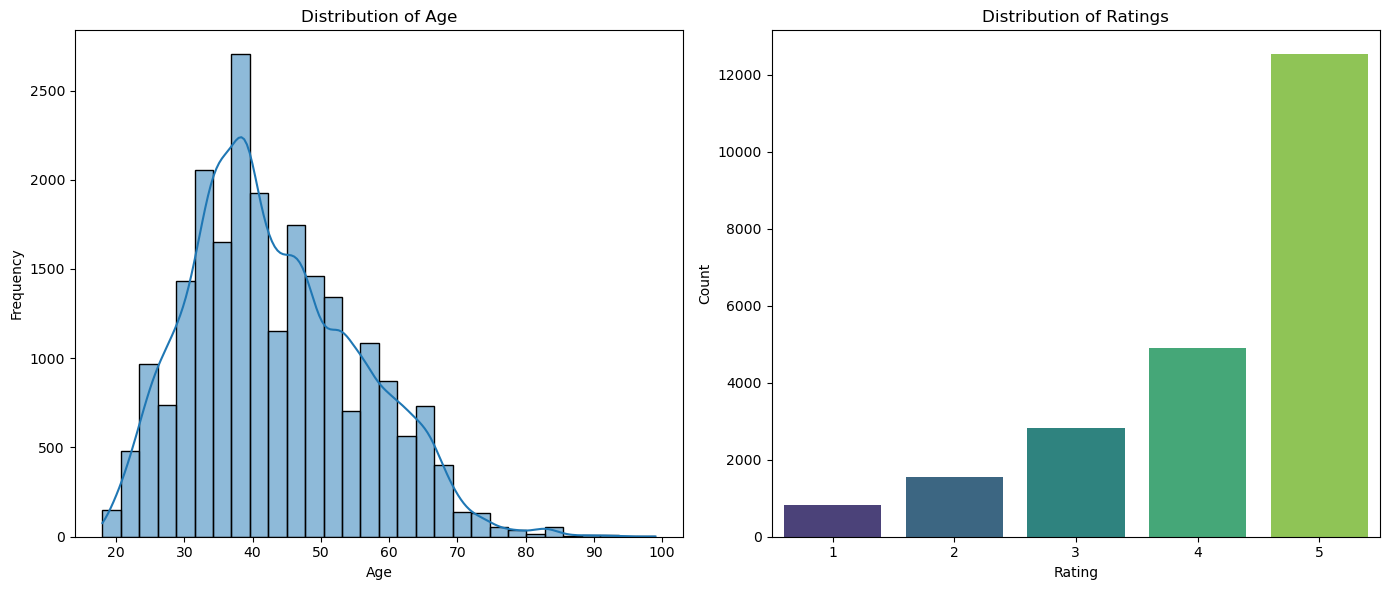

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary of numerical data
stats = df[['Age', 'Rating']].describe()
print(stats)

# Plot distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')


plt.tight_layout()
plt.show()


- **`Age`**: We can see that our average reviewer age is 43, with a standard deviation of 12.33, Median age is 41 and range between 18 - 99. Distribution is slightly right skewed.  
- **`Rating`**: Average rating of 4.18, Median rating is 5 and range between 1 to 5. Distribution is skewed towards higher ratings, indicating that most of our reviews are positive.

#### Categorical Data

/var/folders/hr/ls1y97wn2334282q1yv5t58m0000gp/T/ipykernel_9936/3508334245.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Type', data=df, order = df['Type'].value_counts().index, palette='coolwarm')
/var/folders/hr/ls1y97wn2334282q1yv5t58m0000gp/T/ipykernel_9936/3508334245.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts, y=title_counts.index, palette='summer')
/var/folders/hr/ls1y97wn2334282q1yv5t58m0000gp/T/ipykernel_9936/3508334245.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts_filtered, y

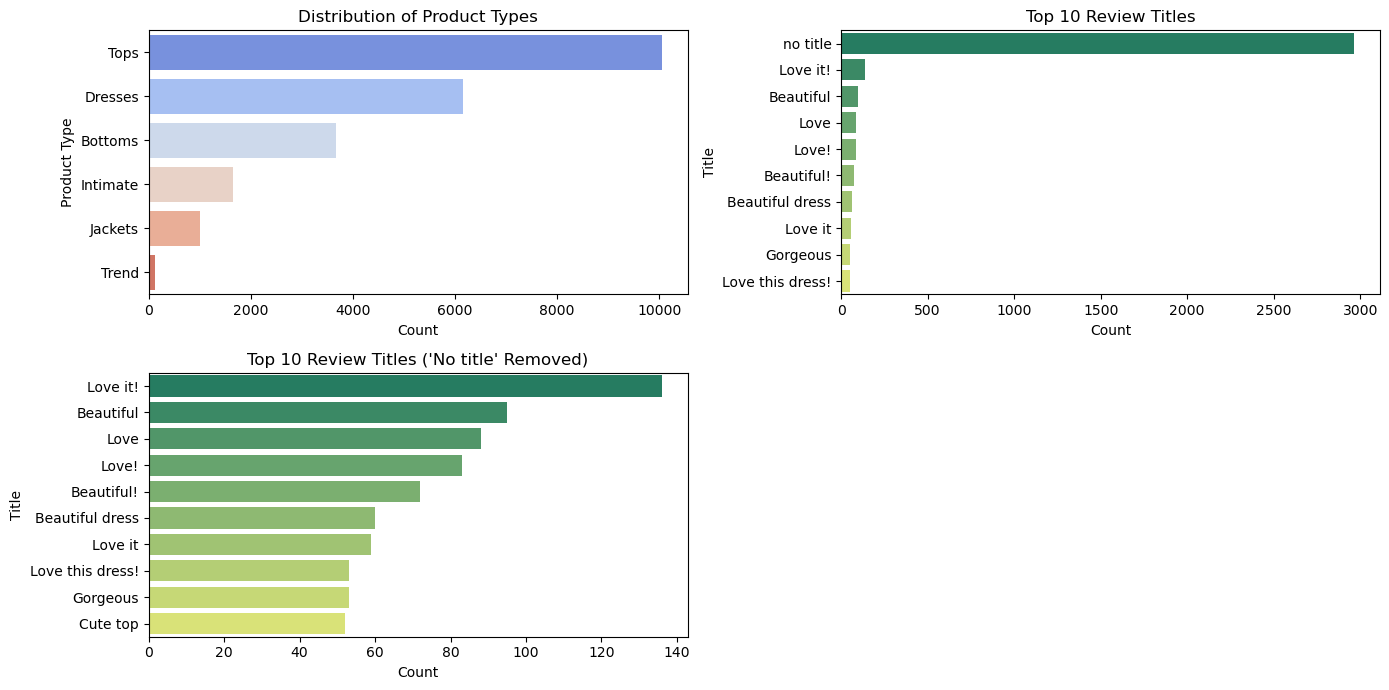

In [15]:
# Plot Product Types and Top 10 Review Titles
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.countplot(y='Type', data=df, order = df['Type'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Product Types')
plt.xlabel('Count')
plt.ylabel('Product Type')

plt.subplot(2, 2, 2)
title_counts = df['Title'].value_counts().head(10)
sns.barplot(x=title_counts, y=title_counts.index, palette='summer')
plt.title('Top 10 Review Titles')
plt.xlabel('Count')
plt.ylabel('Title')

#Filter out 'no title'
filtered_df = df[df['Title'] != 'no title']
title_counts_filtered = filtered_df['Title'].value_counts().head(10)

plt.subplot(2, 2, 3)
sns.barplot(x=title_counts_filtered, y=title_counts_filtered.index, palette='summer')
plt.title("Top 10 Review Titles ('No title' Removed)")
plt.xlabel('Count')
plt.ylabel('Title')


plt.tight_layout()
plt.show()

- **`Type`**: We have a total of 6 product types, most of the reviews are for Tops, following by Dresses and Bottoms. Intimate and Jackets have fewer reviews, suggesting less purchased or reviewed.
- **`Title`**: A lot of reviews had no title, and after filtering out the 'No title' placeholder, our Top 10 review titles are mostly positive such as 'Love', 'Beautiful'. This confirms our findings in the ratings category where most of the ratings are positive.

#### Text_Review
In this part we will first preprocess the text.
- Tokenize the Text
- Filter out common English stopwords

In [16]:
# improt NLTK for tokenization and stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shuyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shuyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

/var/folders/hr/ls1y97wn2334282q1yv5t58m0000gp/T/ipykernel_9936/839978127.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[freq for (word, freq) in common_words], y=[word for (word, freq) in common_words], palette='plasma')


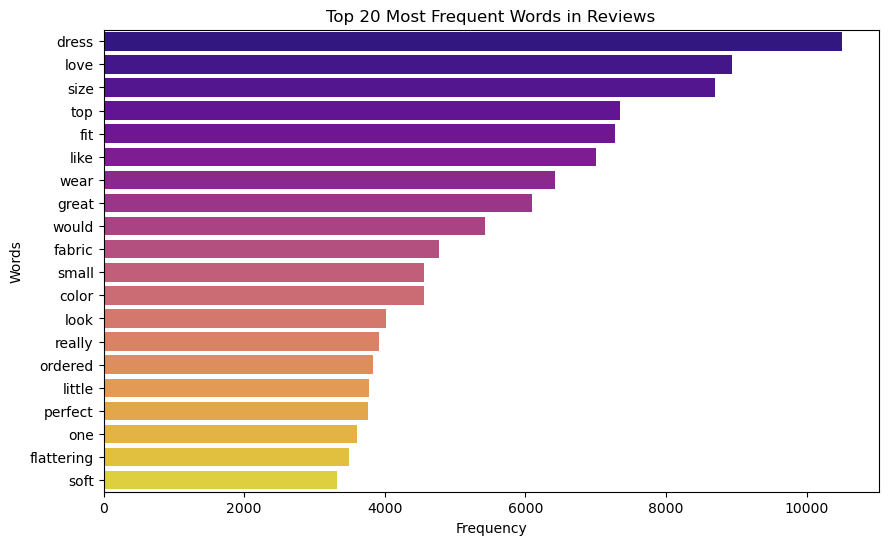

In [17]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Concatenate all review texts into a single string
text = " ".join(review for review in df.Text_Review)

# Tokenize the text
words = word_tokenize(text.lower())

# Filter stopwords and non-alphabetic words
filtered_words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]

# Count word frequencies
word_freq = Counter(filtered_words)

# Most common words
common_words = word_freq.most_common(20)

# Plotting the word frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x=[freq for (word, freq) in common_words], y=[word for (word, freq) in common_words], palette='plasma')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


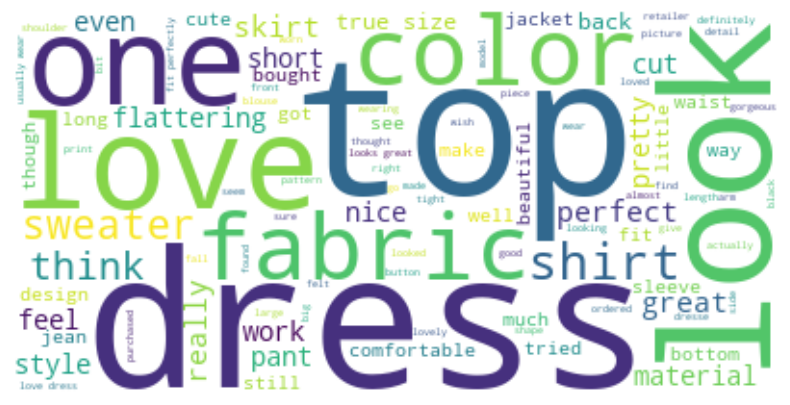

In [14]:
from wordcloud import WordCloud

# Rejoin filtered words for word cloud
filtered_text = ' '.join(filtered_words)

# Create and generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(filtered_text)

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- **'love'**' and **''great'**' appeared significantly in our reviews suggesting high customer satisfaction.
- Attributes like **''Fit'**', **''Fabric'**' suggest that these are the factors that customers love about the products.
- Words like **''top'**', **''dress'**', **''sweater'**' are also common, suggesting the common products and aspects that reviewers focus on.

<a id='DP'></a>
### Data Preprocessing
* Lowercasing: Convert all text to lowercase.
* Remove Punctuation: Strip out punctuation marks.
* Tokenization: Split text into individual words or tokens.
* Remove Stop Words: Eliminate common words that do not carry significant meaning (e.g., “and”, “the”).
* Lemmatization/Stemming: Reduce words to their base or root form.
* Removing Special Characters: Clean the text from any special characters that are not useful.

In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK data
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/shuyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Initialize lemmatizer and stop words

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define the preprocess function
def preprocess_text(text):
    # lower
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into the text
    return ' '.join(tokens)

# Example
text_example = 'I love it!'
print(preprocess_text(text_example))

love


In [17]:
# Apply the preprocess function to our df
# we will apply this to the title review combiend column we had earlier
df['processed_review'] = df['Combined_Review'].apply(preprocess_text)
df.head(10)

,Product_ID,Age,Title,Text_Review,Rating,Type,Combined_Review,processed_review
0,767,33,no title,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,1080,34,no title,Love this dress! it's sooo pretty. i happene...,5,Dresses,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store im ...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Some major design flaws. I had such high hopes...,major design flaw high hope dress really wante...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,"My favorite buy!. I love, love, love this jump...",favorite buy love love love jumpsuit fun flirt...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Flattering shirt. This shirt is very flatterin...,flattering shirt shirt flattering due adjustab...
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,Dresses,Not for the very petite. I love tracy reese dr...,petite love tracy reese dress one petite 5 foo...
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,Tops,Cagrcoal shimmer fun. I aded this in my basket...,cagrcoal shimmer fun aded basket hte last mint...
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,Tops,"Shimmer, surprisingly goes with lots. I ordere...",shimmer surprisingly go lot ordered carbon sto...
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,Dresses,Flattering. I love this dress. i usually get a...,flattering love dress usually get x run little...
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,Dresses,"Such a fun dress!. I'm 5""5' and 125 lbs. i ord...",fun dress im 55 125 lb ordered petite make sur...


<a id='SA'></a>
### Sentiment Analysis
We will use TextBlob to calculate sentiment scores for each review and add them as a new column in the df.

In [18]:
from textblob import TextBlob

# Define the sentiment score function
def get_sentiment(text):
    blob = TextBlob(text)
    # Polarity score range from -1 (negative) to 1 (positive)
    polarity = blob.sentiment.polarity
    # Subjectivity ranges from 0 (objective) to 1 (subjective)
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

# Example
example = 'I love this!'
print(get_sentiment(example)) 

(0.625, 0.6)


In [19]:
# Apply it to our df
df['polarity'], df['subjectivity'] = zip(*df['processed_review'].apply(get_sentiment))
df.head(10)

,Product_ID,Age,Title,Text_Review,Rating,Type,Combined_Review,processed_review,polarity,subjectivity
0,767,33,no title,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,0.633333,0.933333
1,1080,34,no title,Love this dress! it's sooo pretty. i happene...,5,Dresses,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store im ...,0.318750,0.725000
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Some major design flaws. I had such high hopes...,major design flaw high hope dress really wante...,0.081439,0.352567
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,"My favorite buy!. I love, love, love this jump...",favorite buy love love love jumpsuit fun flirt...,0.500000,0.678571
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Flattering shirt. This shirt is very flatterin...,flattering shirt shirt flattering due adjustab...,0.458333,0.658333
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,Dresses,Not for the very petite. I love tracy reese dr...,petite love tracy reese dress one petite 5 foo...,0.150000,0.542857
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,Tops,Cagrcoal shimmer fun. I aded this in my basket...,cagrcoal shimmer fun aded basket hte last mint...,0.120500,0.369333
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,Tops,"Shimmer, surprisingly goes with lots. I ordere...",shimmer surprisingly go lot ordered carbon sto...,0.259135,0.433654
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,Dresses,Flattering. I love this dress. i usually get a...,flattering love dress usually get x run little...,-0.046875,0.400000
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,Dresses,"Such a fun dress!. I'm 5""5' and 125 lbs. i ord...",fun dress im 55 125 lb ordered petite make sur...,0.254978,0.495593


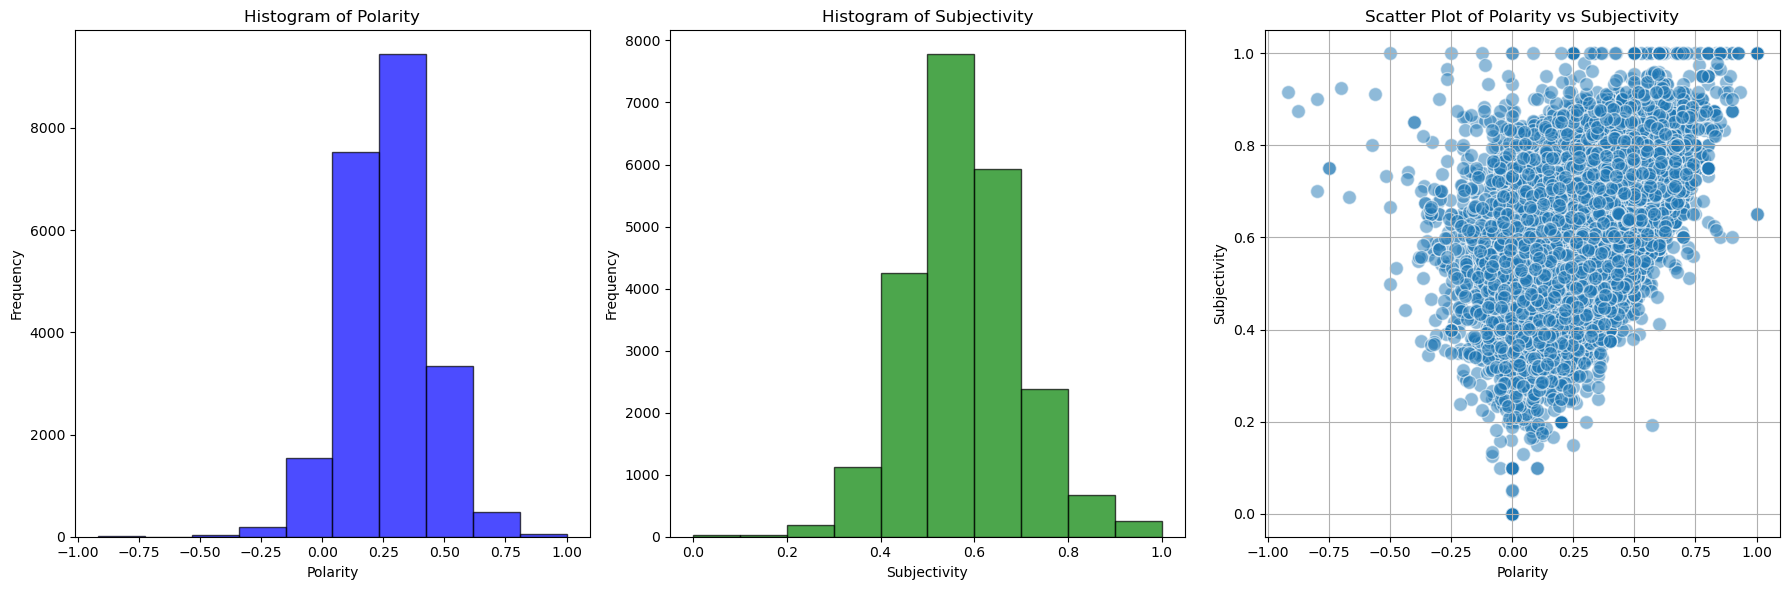

In [20]:
# Plot the polarity and subjectivity
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Polarity only
axes[0].hist(df['polarity'], bins=10, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Histogram of Polarity')
axes[0].set_xlabel('Polarity')
axes[0].set_ylabel('Frequency')

# Subjectivity only
axes[1].hist(df['subjectivity'], bins=10, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Histogram of Subjectivity')
axes[1].set_xlabel('Subjectivity')
axes[1].set_ylabel('Frequency')

# Polarity vs Subjectivity
axes[2].scatter(df['polarity'], df['subjectivity'], alpha=0.5, edgecolors='w', s=100)
axes[2].set_title('Scatter Plot of Polarity vs Subjectivity')
axes[2].set_xlabel('Polarity')
axes[2].set_ylabel('Subjectivity')
axes[2].grid(True)

plt.tight_layout()
plt.show()

* Customer Sentiment: The overall sentiment of the reviews is mildly positive, with a central tendency towards moderate positivity and subjectivity. This suggests that while customers generally feel positive about the products, they are not overwhelmingly so.

* Review Characteristics: Most reviews are subjective, meaning customers often express personal opinions and experiences rather than objective facts. 

* No clear correlation between polarity and subjectivity

Next we will use Huggingface's pretrained NLP Model to label each review as Negative, Netural, Postive to gain more insights.

#### Apply transformers model

In [21]:

from transformers import pipeline

/Users/shuyan/anaconda3/envs/gl_interview/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
from tqdm import tqdm

In [27]:
# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model='cardiffnlp/twitter-roberta-base-sentiment')

# Preprocess reviews
reviews = df['processed_review'].tolist()

# def function to callsify sentiment using Huggingface model, to improve efficiency, we will process data in batches

def classify_sentiment(text, batch_size=32):
    sentiments = []
    for i in tqdm(range(0, len(reviews), batch_size)):
        batch = reviews[i:i+batch_size]
        results = sentiment_pipeline(batch)
        sentiments.extend([result['label'] for result in results])
    return sentiments


/Users/shuyan/anaconda3/envs/gl_interview/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [28]:
# Apply the classify function to our df
df['sentiment_category'] = classify_sentiment(reviews)
df.head(10)

100%|██████████| 708/708 [50:15<00:00,  4.26s/it] 


,Product_ID,Age,Title,Text_Review,Rating,Type,Combined_Review,processed_review,polarity,subjectivity,sentiment_category
0,767,33,no title,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,0.633333,0.933333,LABEL_2
1,1080,34,no title,Love this dress! it's sooo pretty. i happene...,5,Dresses,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store im ...,0.318750,0.725000,LABEL_2
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Some major design flaws. I had such high hopes...,major design flaw high hope dress really wante...,0.081439,0.352567,LABEL_1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,"My favorite buy!. I love, love, love this jump...",favorite buy love love love jumpsuit fun flirt...,0.500000,0.678571,LABEL_2
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Flattering shirt. This shirt is very flatterin...,flattering shirt shirt flattering due adjustab...,0.458333,0.658333,LABEL_2
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,Dresses,Not for the very petite. I love tracy reese dr...,petite love tracy reese dress one petite 5 foo...,0.150000,0.542857,LABEL_2
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,Tops,Cagrcoal shimmer fun. I aded this in my basket...,cagrcoal shimmer fun aded basket hte last mint...,0.120500,0.369333,LABEL_2
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,Tops,"Shimmer, surprisingly goes with lots. I ordere...",shimmer surprisingly go lot ordered carbon sto...,0.259135,0.433654,LABEL_2
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,Dresses,Flattering. I love this dress. i usually get a...,flattering love dress usually get x run little...,-0.046875,0.400000,LABEL_2
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,Dresses,"Such a fun dress!. I'm 5""5' and 125 lbs. i ord...",fun dress im 55 125 lb ordered petite make sur...,0.254978,0.495593,LABEL_2


In [33]:
# Map labels to Negative, neutral and postitive categories
label_mapping = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive'
}

# Apply mapping to raw sentiment labels
df['sentiment_category'] = [label_mapping[label] for label in df['sentiment_category']]
df.head()

,Product_ID,Age,Title,Text_Review,Rating,Type,Combined_Review,processed_review,polarity,subjectivity,sentiment_category
0,767,33,no title,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,0.633333,0.933333,Positive
1,1080,34,no title,Love this dress! it's sooo pretty. i happene...,5,Dresses,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store im ...,0.318750,0.725000,Positive
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Some major design flaws. I had such high hopes...,major design flaw high hope dress really wante...,0.081439,0.352567,Neutral
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,"My favorite buy!. I love, love, love this jump...",favorite buy love love love jumpsuit fun flirt...,0.500000,0.678571,Positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Flattering shirt. This shirt is very flatterin...,flattering shirt shirt flattering due adjustab...,0.458333,0.658333,Positive


In [34]:
# Save the DataFrame to a CSV file
output_file = 'reviews_with_sentiment.csv'
df.to_csv(output_file, index=False)

In [19]:
df = pd.read_csv('reviews_with_sentiment.csv')
df.head()

,Product_ID,Age,Title,Text_Review,Rating,Type,Combined_Review,processed_review,polarity,subjectivity,sentiment_category
0,767,33,no title,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,0.633333,0.933333,Positive
1,1080,34,no title,Love this dress! it's sooo pretty. i happene...,5,Dresses,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store im ...,0.318750,0.725000,Positive
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Some major design flaws. I had such high hopes...,major design flaw high hope dress really wante...,0.081439,0.352567,Neutral
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,"My favorite buy!. I love, love, love this jump...",favorite buy love love love jumpsuit fun flirt...,0.500000,0.678571,Positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Flattering shirt. This shirt is very flatterin...,flattering shirt shirt flattering due adjustab...,0.458333,0.658333,Positive


/var/folders/hr/ls1y97wn2334282q1yv5t58m0000gp/T/ipykernel_9936/3536548626.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='viridis')


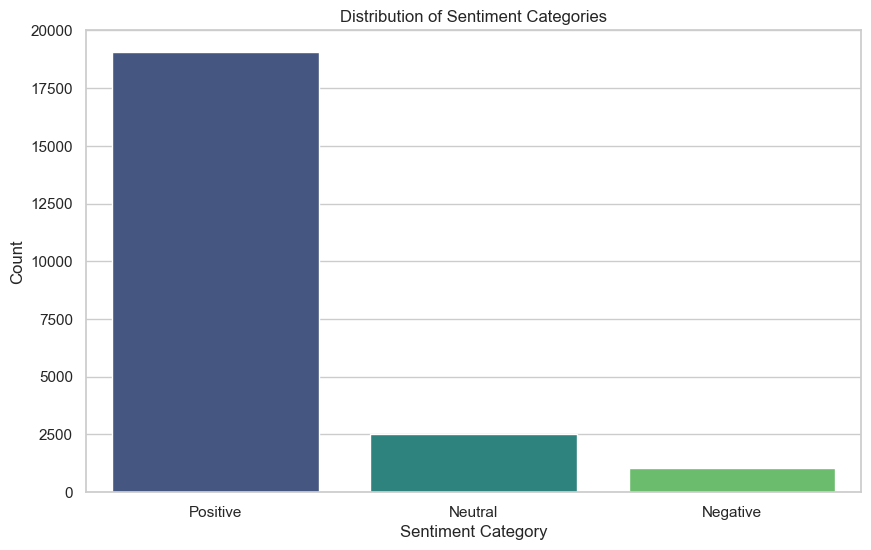

In [20]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Bar plot for sentiment categories
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', data=df, palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

From the bar plot we can see that most of the reviews we have are positive with around 2,500 reviews feeling neutral and about 1000 of negative reviews.

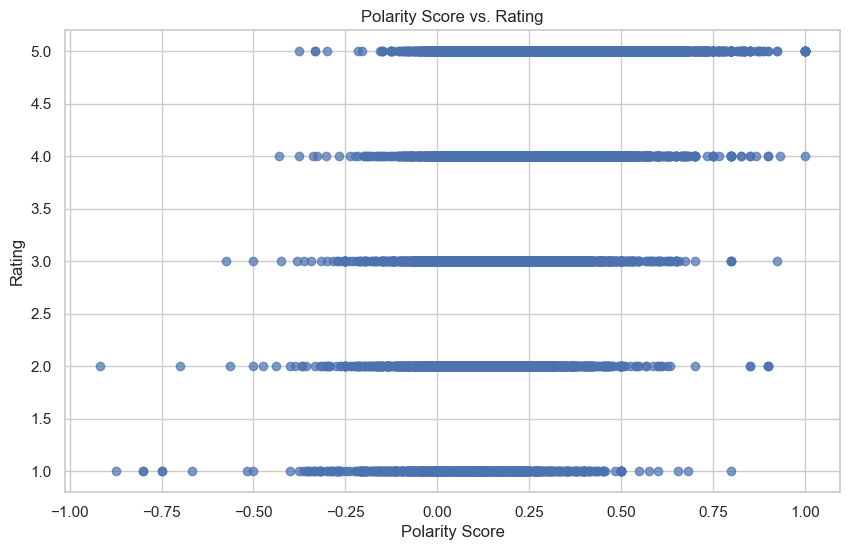

In [21]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['polarity'], df['Rating'], alpha=0.7)
plt.title('Polarity Score vs. Rating')
plt.xlabel('Polarity Score')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

#### Sentiment by Group

In [22]:
# Separate df by Sentiment Category
positive_reviews_df = df[df['sentiment_category'] == 'Positive']
negative_reviews_df = df[df['sentiment_category'] == 'Negative']
neutral_reviews_df = df[df['sentiment_category'] == 'Neutral']
neutral_reviews_df.head()

,Product_ID,Age,Title,Text_Review,Rating,Type,Combined_Review,processed_review,polarity,subjectivity,sentiment_category
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Some major design flaws. I had such high hopes...,major design flaw high hope dress really wante...,0.081439,0.352567,Neutral
21,1080,55,I'm torn!,"I'm upset because for the price of the dress, ...",4,Dresses,I'm torn!. I'm upset because for the price of ...,im torn im upset price dress thought embroider...,0.124621,0.537879,Neutral
25,697,31,Falls flat,"Loved the material, but i didnt really look at...",3,Intimate,"Falls flat. Loved the material, but i didnt re...",fall flat loved material didnt really look lon...,0.232857,0.360714,Neutral
43,89,67,Some things you should know...,"First, this is thermal ,so naturally i didn't ...",4,Intimate,"Some things you should know.... First, this is...",thing know first thermal naturally didnt expec...,0.149860,0.481092,Neutral
58,1095,36,no title,"I got this in the petite length, size o, and i...",4,Dresses,"I got this in the petite length, size o, and i...",got petite length size fit right like didnt al...,0.178492,0.415159,Neutral


#### Most Common Words by Sentiment Group


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
# Function to get the most common words
def get_most_common_words(reviews, n=20):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(reviews)
    word_counts = np.asarray(X.sum(axis=0)).flatten()
    words = vectorizer.get_feature_names_out()
    word_freq = dict(zip(words, word_counts))
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[:n]

In [24]:
# Get most common words for positive, negative, and neutral reviews
positive_common_words = get_most_common_words(positive_reviews_df['processed_review'])
negative_common_words = get_most_common_words(negative_reviews_df['processed_review'])
neutral_common_words = get_most_common_words(neutral_reviews_df['processed_review'])

print("Most common words in positive reviews:")
print(positive_common_words)

print("\nMost common words in negative reviews:")
print(negative_common_words)

print("\nMost common words in neutral reviews:")
print(neutral_common_words)

Most common words in positive reviews:
[('dress', 11024), ('love', 10189), ('fit', 9329), ('size', 7971), ('great', 7637), ('color', 6472), ('look', 5874), ('wear', 5805), ('like', 5572), ('im', 5045), ('perfect', 4392), ('fabric', 4167), ('cute', 4165), ('beautiful', 4109), ('small', 3901), ('flattering', 3599), ('really', 3493), ('little', 3465), ('soft', 3366), ('comfortable', 3298)]

Most common words in negative reviews:
[('dress', 583), ('like', 499), ('look', 433), ('fit', 395), ('fabric', 318), ('size', 315), ('didnt', 291), ('disappointed', 270), ('quality', 251), ('im', 246), ('color', 237), ('ordered', 231), ('love', 207), ('material', 201), ('small', 200), ('really', 193), ('shirt', 179), ('looked', 173), ('wear', 171), ('work', 167)]

Most common words in neutral reviews:
[('dress', 1363), ('size', 1287), ('like', 1177), ('fit', 1042), ('small', 797), ('look', 768), ('im', 704), ('wear', 649), ('color', 648), ('fabric', 642), ('ordered', 551), ('run', 457), ('large', 446),

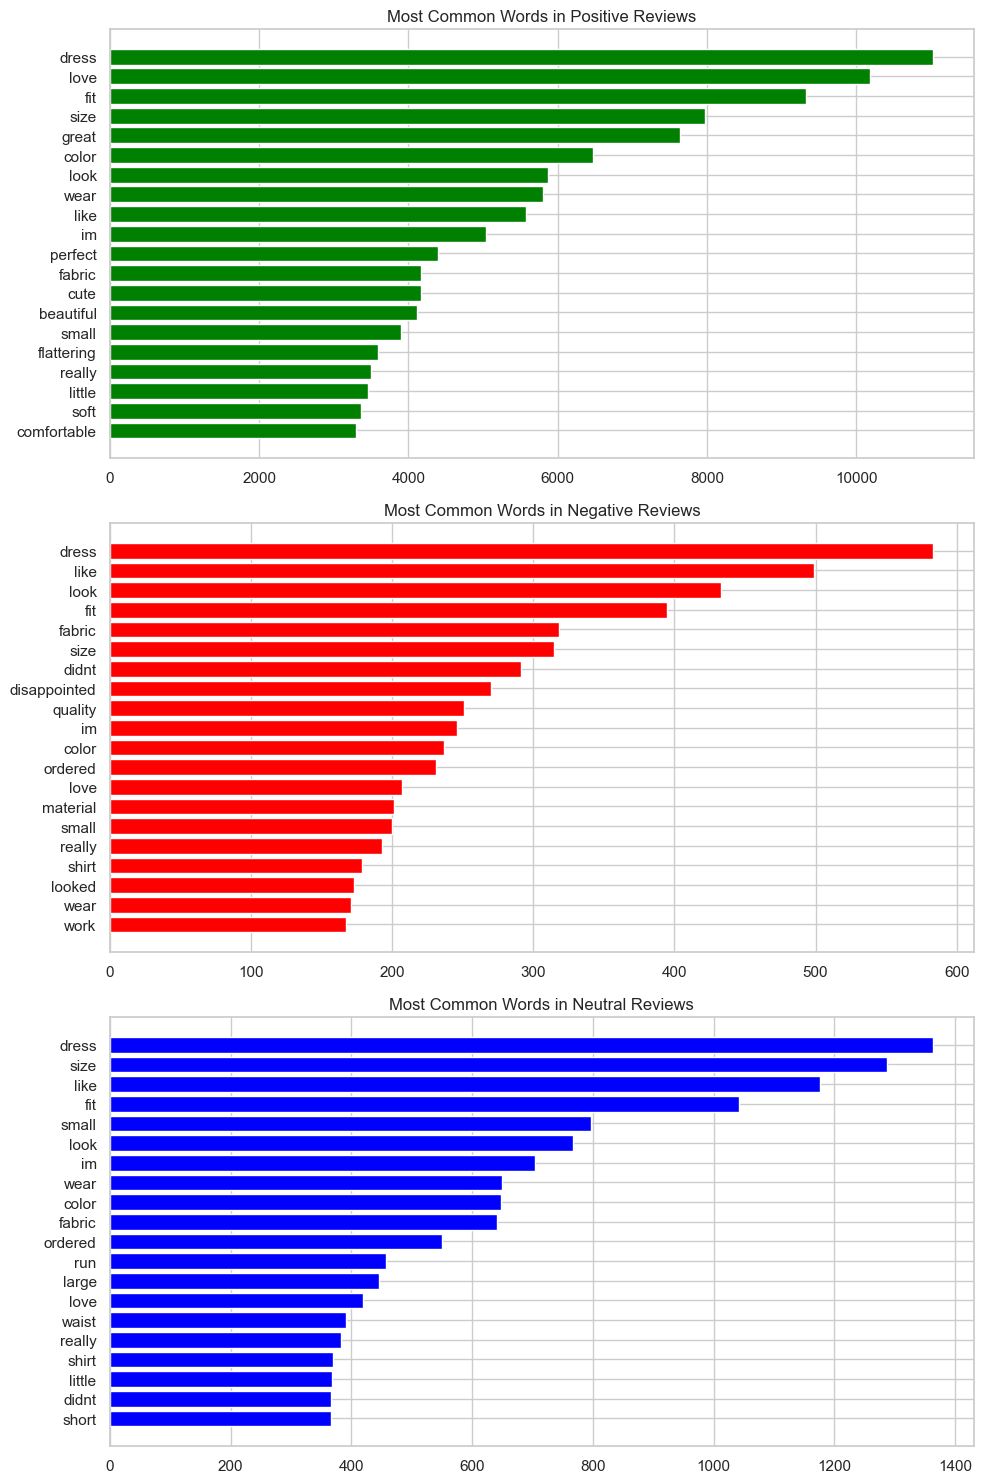

In [25]:
# plot the words
# Prepare data for plotting
positive_words, positive_counts = zip(*positive_common_words)
negative_words, negative_counts = zip(*negative_common_words)
neutral_words, neutral_counts = zip(*neutral_common_words)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot positive words
axes[0].barh(positive_words, positive_counts, color='green')
axes[0].set_title('Most Common Words in Positive Reviews')
axes[0].invert_yaxis()

# Plot negative words
axes[1].barh(negative_words, negative_counts, color='red')
axes[1].set_title('Most Common Words in Negative Reviews')
axes[1].invert_yaxis()

# Plot neutral words
axes[2].barh(neutral_words, neutral_counts, color='blue')
axes[2].set_title('Most Common Words in Neutral Reviews')
axes[2].invert_yaxis()

# Adjust layout
plt.tight_layout()
plt.show()

- **Postive Reviews Common Words**: Fit, Size, Color, Fabric, Cute, Soft, Comfortable
- **Neutral Reviews Common Words**: Size, Fit, Small, Color, Fabric, Large, Waist, Little, Short
- **Postive Reviews Common Words**: Look, Fit, Fabric, Size, Quality, Color, Materiial, Small, Shirt

Although we see common words like **Quality** in negative review that possibly showing poor quality of the product, but the context is not clear, next we will seperate data into `Age`, `Product_ID` and `Type` to gain more accurate insights.


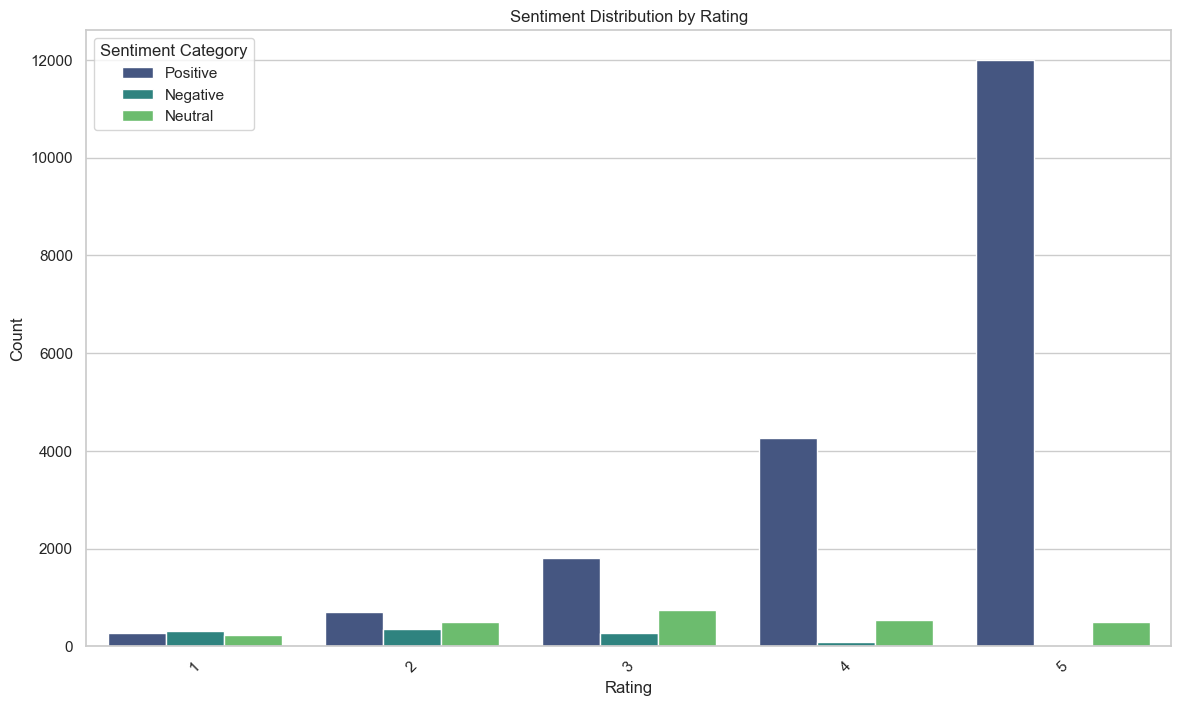

In [26]:
# Plotting Product Type vs. Sentiment
plt.figure(figsize=(14, 8))
sns.countplot(x='Rating', hue='sentiment_category', data=df, palette='viridis')
plt.title('Sentiment Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment Category')
plt.xticks(rotation=45)
plt.show()

<a id='NLP'></a>
### Rating Based NLP Analysis

We will segment our reviews based on customer ratings to deepen our insights. From our sentiment analysis, we infer that ratings accurately reflect customers’ opinions of their purchases. Additionally, analyzing these ratings helps identify specific pain points associated with each product.

We separate ratings:

- **Low_Ratings**: 1 and 2 ratings
- **Netural_Ratings**: 3 and 4 ratings
- **High_Ratings**: 5 ratings

In [27]:
Low_Ratings = df[(df['Rating'] == 1) | (df['Rating'] == 2)]
Netural_Ratings = df[(df['Rating'] == 3) | (df['Rating'] == 4)]
High_Ratings = df[df['Rating'] == 5]
Low_Ratings.shape,Netural_Ratings.shape,High_Ratings.shape

((2370, 11), (7731, 11), (12527, 11))

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Show the distribution between different group to gain insight for furthur analysis
def plot_rating_type_distribution(data):
    """
    Creates a subplot for each rating group showing the count of product types.

    Parameters:
        data (DataFrame): A pandas DataFrame containing the columns 'Rating' and 'Type'.
    """
    # Filter data into three groups
    low_ratings = data[data['Rating'].isin([1, 2])]
    mid_ratings = data[data['Rating'].isin([3, 4])]
    high_ratings = data[data['Rating'] == 5]
    
    # Count product types in each group
    low_counts = low_ratings['Type'].value_counts()
    mid_counts = mid_ratings['Type'].value_counts()
    high_counts = high_ratings['Type'].value_counts()
    
    # Create subplots
    fig = make_subplots(rows=1, cols=3, subplot_titles=("Low_Ratings", "Netural_Ratings", "High_Ratings"))
    
    # Add bar charts for each rating group
    fig.add_trace(
        go.Bar(x=low_counts.index, y=low_counts.values, name='Low Ratings'),
        row=1, col=1
    )
    fig.add_trace(
        go.Bar(x=mid_counts.index, y=mid_counts.values, name='Mid Ratings'),
        row=1, col=2
    )
    fig.add_trace(
        go.Bar(x=high_counts.index, y=high_counts.values, name='High Ratings'),
        row=1, col=3
    )
    
    # Update layout for better visualization
    fig.update_layout(title_text="Product Type Distribution Across Different Rating Groups", showlegend=False)
    fig.update_xaxes(title_text="Product Type")
    fig.update_yaxes(title_text="Count")
    
    fig.show()
plot_rating_type_distribution(df)

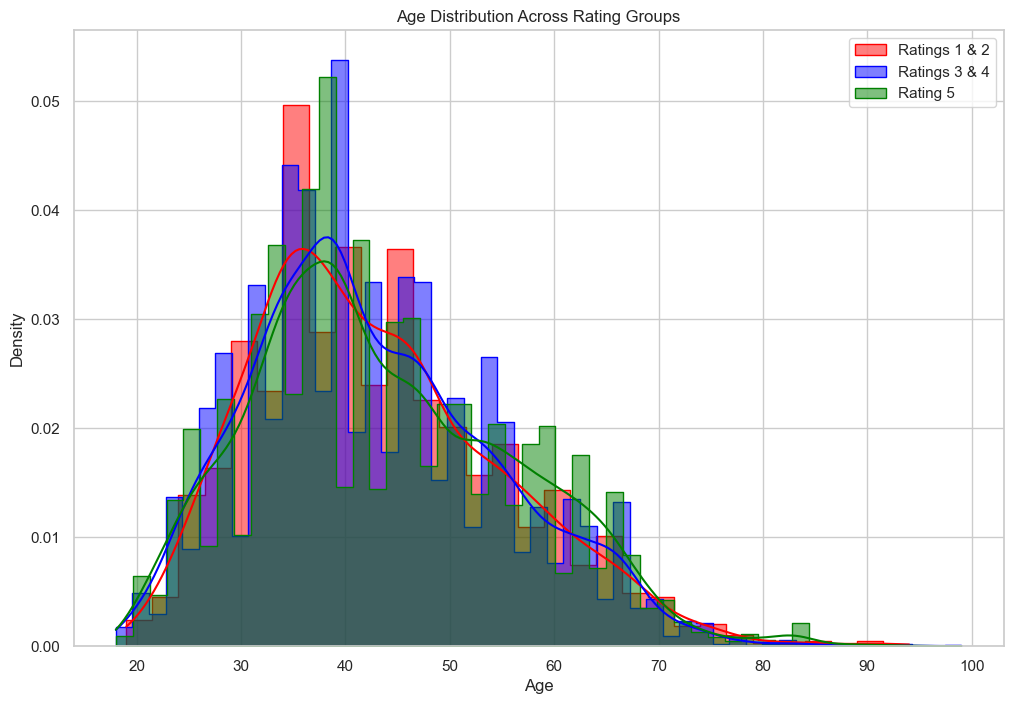

In [68]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a larger figure to hold the plots
plt.figure(figsize=(12, 8))

# Plot age distribution for rating group 1 & 2
sns.histplot(data=df[df['Rating'].isin([1, 2])], x='Age', color='red', label='Ratings 1 & 2', kde=True, element='step', stat='density')

# Plot age distribution for rating group 3 & 4
sns.histplot(data=df[df['Rating'].isin([3, 4])], x='Age', color='blue', label='Ratings 3 & 4', kde=True, element='step', stat='density')

# Plot age distribution for rating 5
sns.histplot(data=df[df['Rating'] == 5], x='Age', color='green', label='Rating 5', kde=True, element='step', stat='density')

# Add title and labels
plt.title('Age Distribution Across Rating Groups')
plt.xlabel('Age')
plt.ylabel('Density')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

The Age distribution suggest that there is no significant differences between Rating Groups, age would not be a major factor of how certain product is rated.

#### Low_Ratings Group Analysis

N-grams Analysis

In [48]:
# Function to get top n-grams for each product type
def get_top_ngrams_by_type(reviews, types, n=2, top_n=10):
    results = {}
    for product_type in types.unique():
        subset_reviews = reviews[types == product_type]
        vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(subset_reviews)
        bag_of_words = vec.transform(subset_reviews)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        results[product_type] = words_freq[:top_n]
    return results


In [53]:
types = Low_Ratings['Type']
processed_reviews = Low_Ratings['processed_review']

# Get top bigrams by type
top_bigrams_by_type = get_top_ngrams_by_type(processed_reviews, types, n=2)

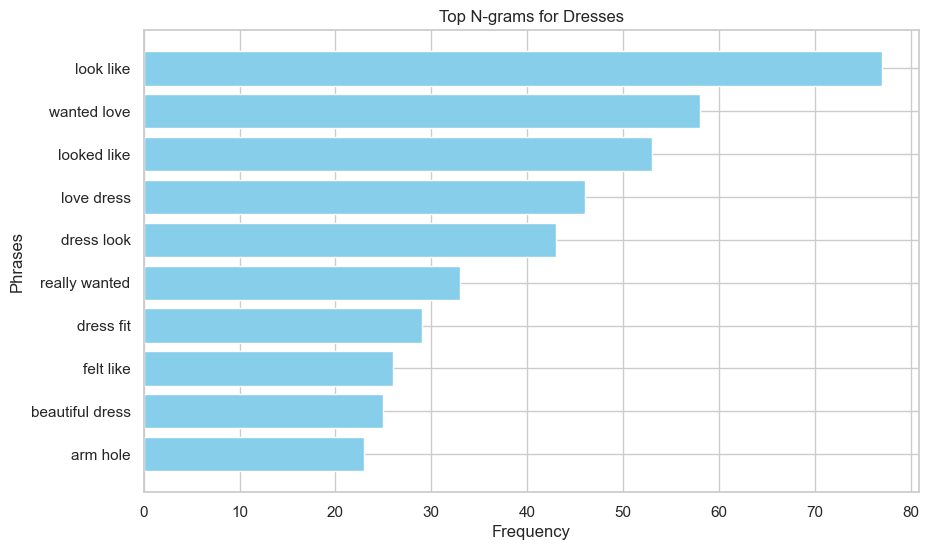

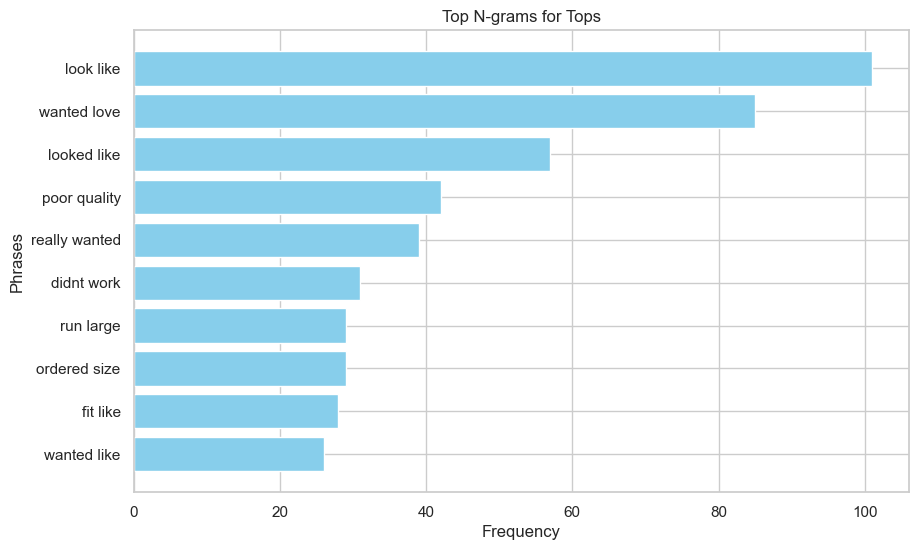

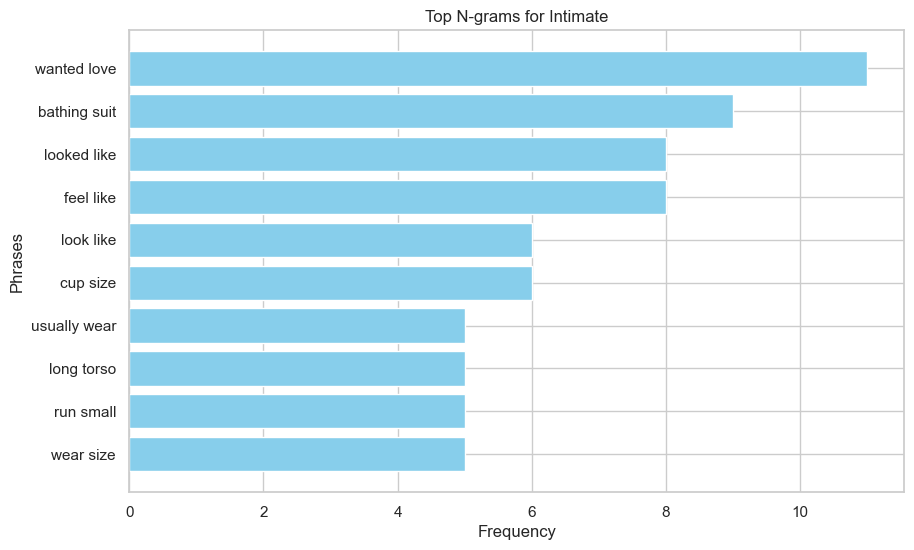

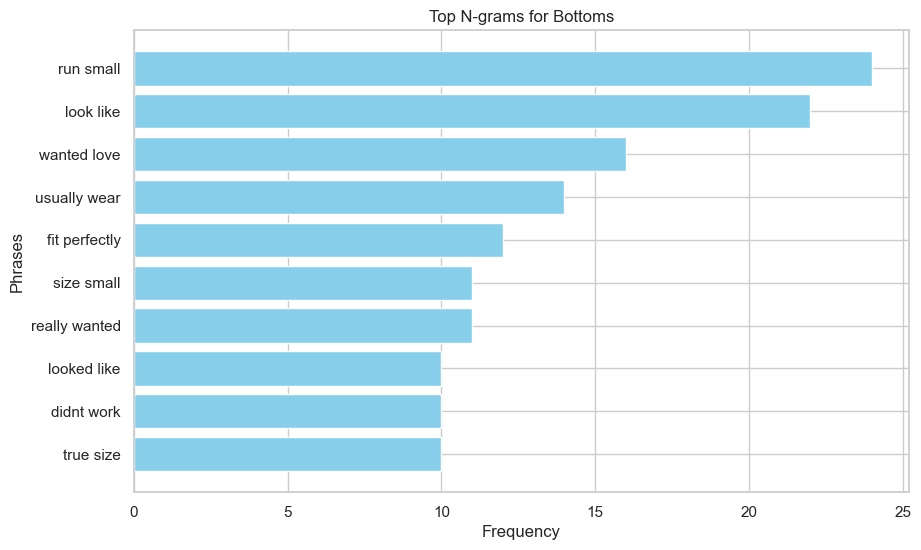

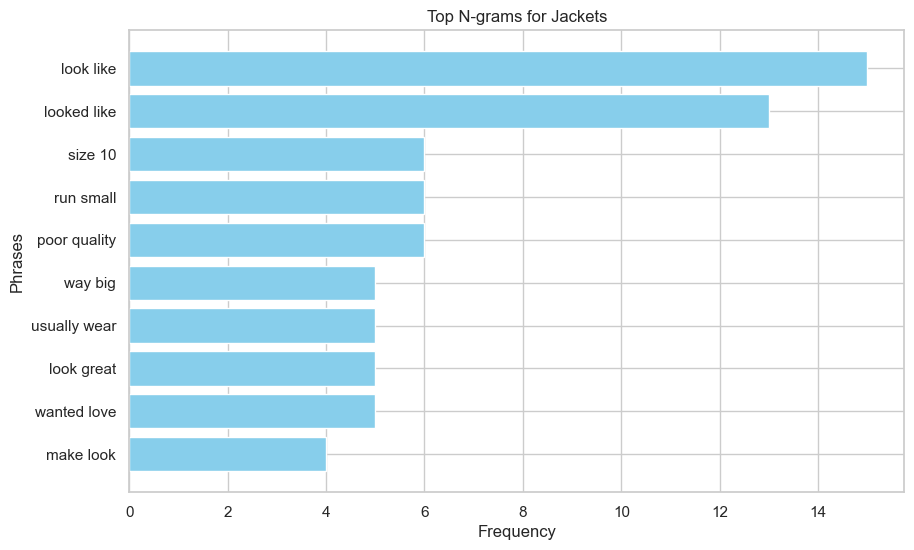

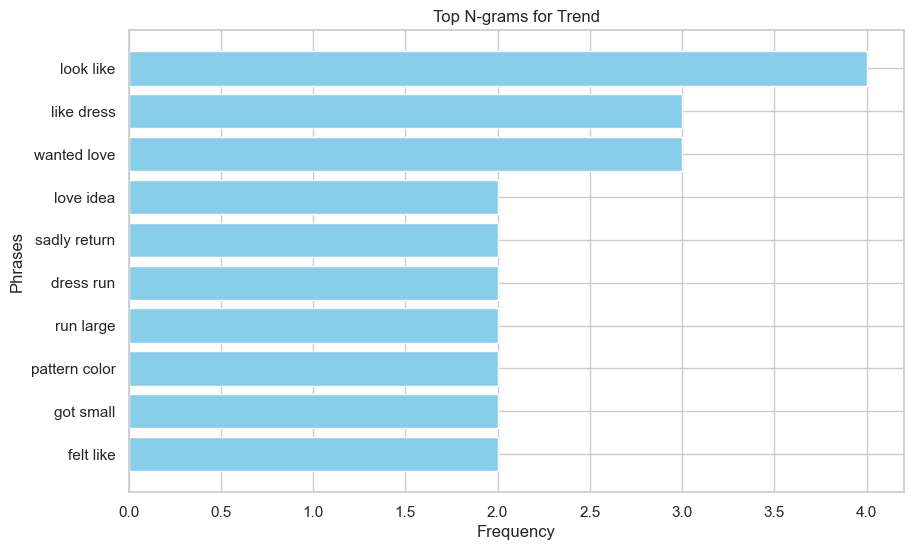

In [54]:
def plot_ngrams(ngrams_dict):
    for product_type, ngrams in ngrams_dict.items():
        ngrams_df = pd.DataFrame(ngrams, columns=['Phrase', 'Frequency'])
        plt.figure(figsize=(10, 6))
        plt.barh(ngrams_df['Phrase'], ngrams_df['Frequency'], color='skyblue')
        plt.title(f'Top N-grams for {product_type}')
        plt.xlabel('Frequency')
        plt.ylabel('Phrases')
        plt.gca().invert_yaxis()
        plt.show()

# Plotting by Type
plot_ngrams(top_bigrams_by_type)

Based on the Bigram analysis:
* For `Dresses`:
    * The only issue customer has is the fit of it, most people mentioned they loved the dress but size won't fit
* For `Tops`:
    * Size run large
    * Poor quality
* For `Intimate`:
    * Size run small
    * Torso part of the dress is too long
* For `Bottom`:
    * Size run small
* For `Jackets`:
    * Size run small
    * Specific issues with size 10
    * Poor quality
* For `Trend`:
    * Run Large
    * Run Small

Conclusion: For Trend products seems that customer run into size issue in general instead of generally large or small, adding a more comprehensive Size Helper might help.


#### Netrual_Ratings Group Analysis

N-grams analysis

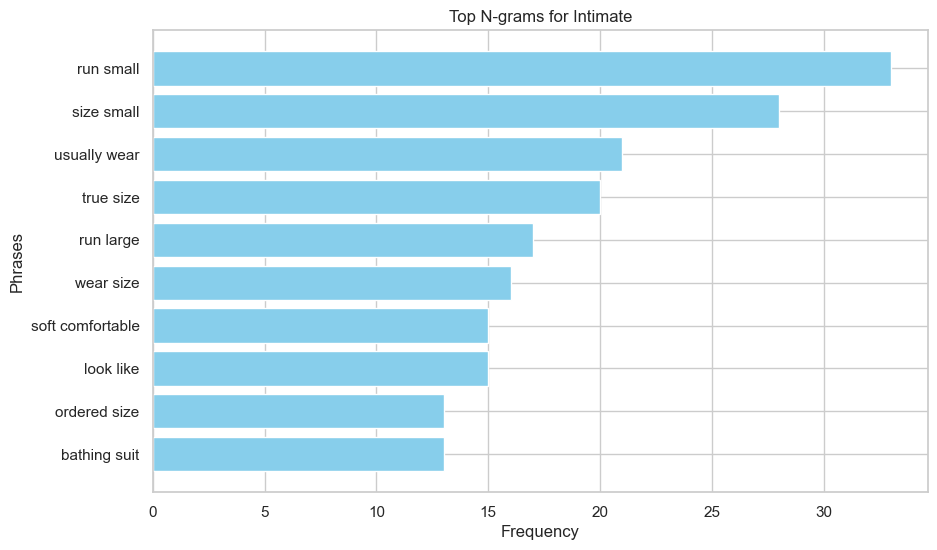

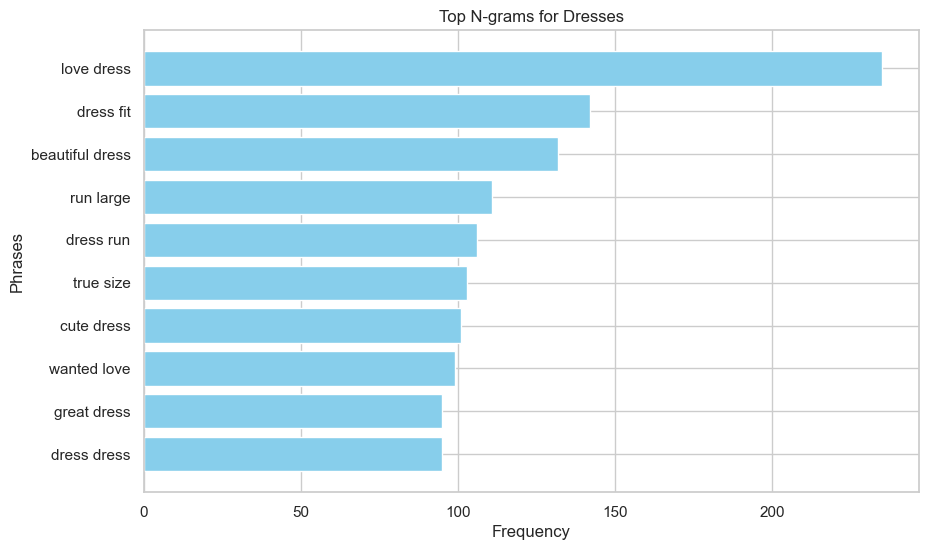

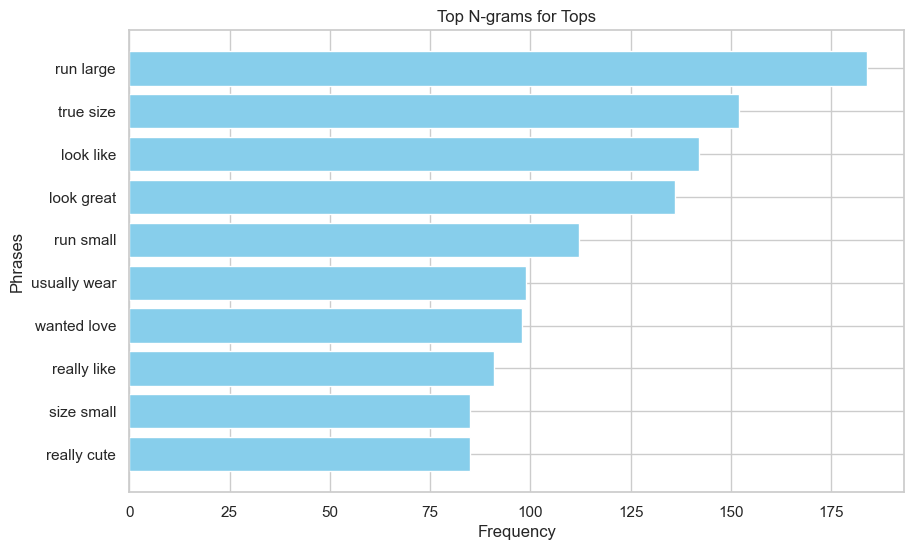

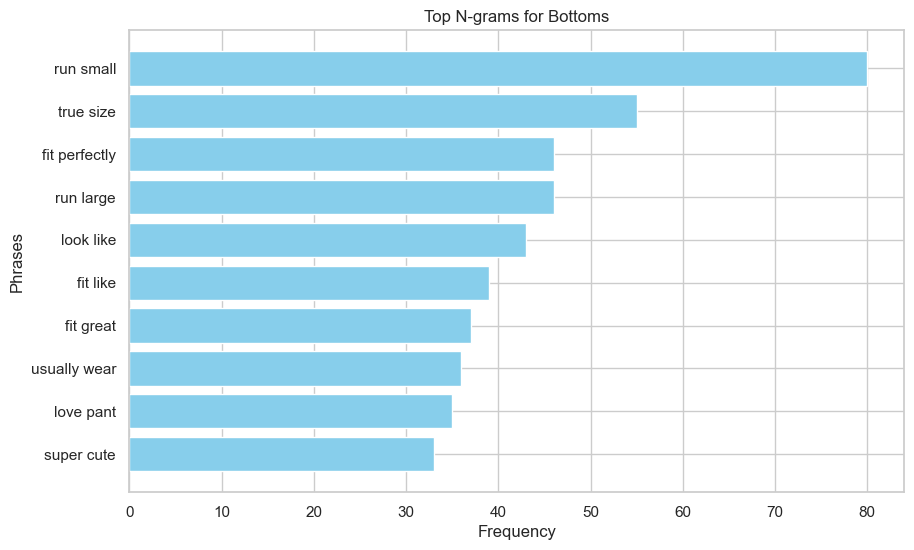

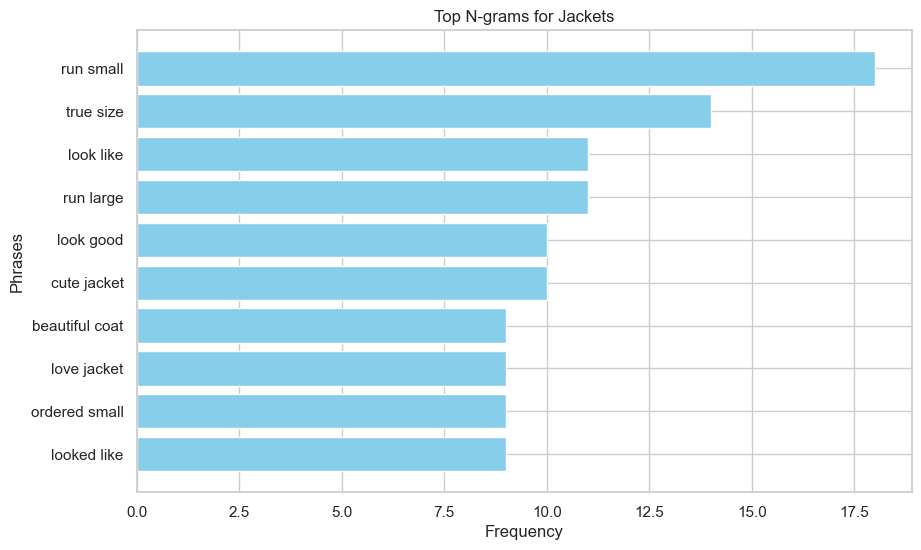

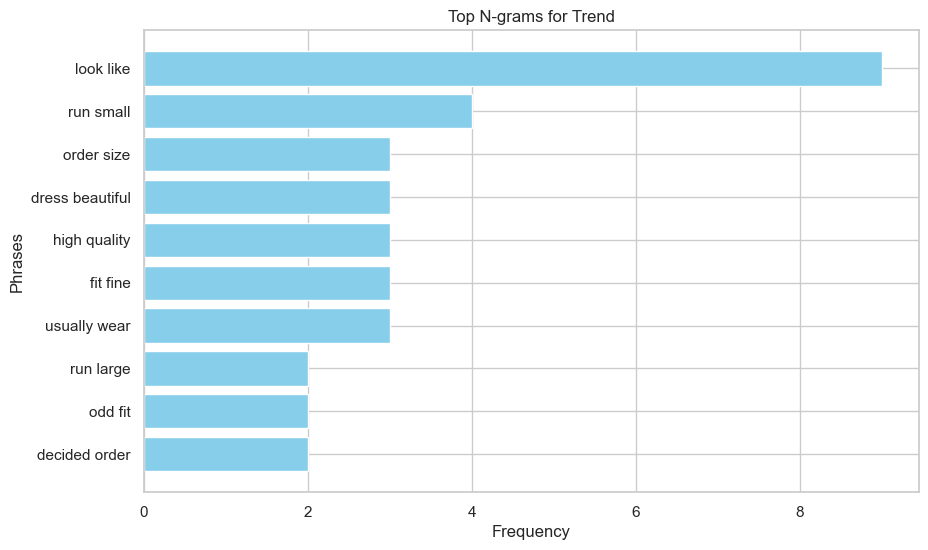

In [65]:
types = Netural_Ratings['Type']
processed_reviews = Netural_Ratings['processed_review']

# Get top bigrams by type
top_bigrams_by_type = get_top_ngrams_by_type(processed_reviews, types, n=2)

# Plotting by Type
plot_ngrams(top_bigrams_by_type)

Based on the Bigram analysis:

Working:
* For `Dresses`:
    * Beautiful
    * Fit good
* For `Tops`:
    * Looks great
    * Fit good
* For `Intimate`:
    * Good material: Soft and comfortable
    * Bathing suit is getting good feedback
    * Fit good
* For `Bottom`:
    * Looks great
    * Fit good
* For `Jackets`:
    * Beautiful coat
    * Fit good
* For `Trend`:
    * High quality
    * Fit good

Not Working:
* For `Dresses`:
    * Size issue
* For `Tops`:
    * Size issue
* For `Intimate`:
    * Size issue
* For `Bottom`:
    * Size issue
* For `Jackets`:
    * Size issue
* For `Trend`:
    * Size issue

Conclusion:
Customers are loving the design, quality and material of the products, however, the most issues customer has were about the size of the product, some customer thinks they fit good where some customers ran into size issue. This suggest the additional assistance of sizing should be applied to help.

#### High_ratings Group Analysis

N-grams Analysis

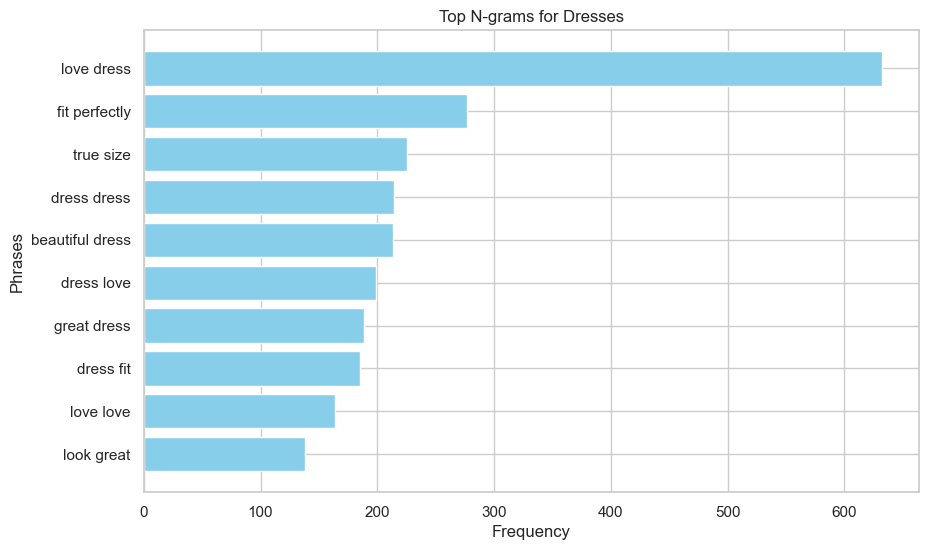

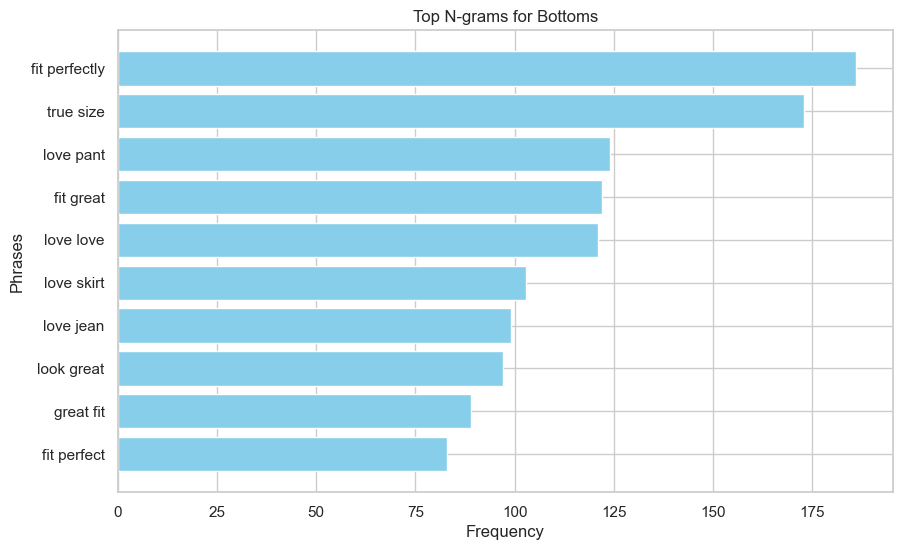

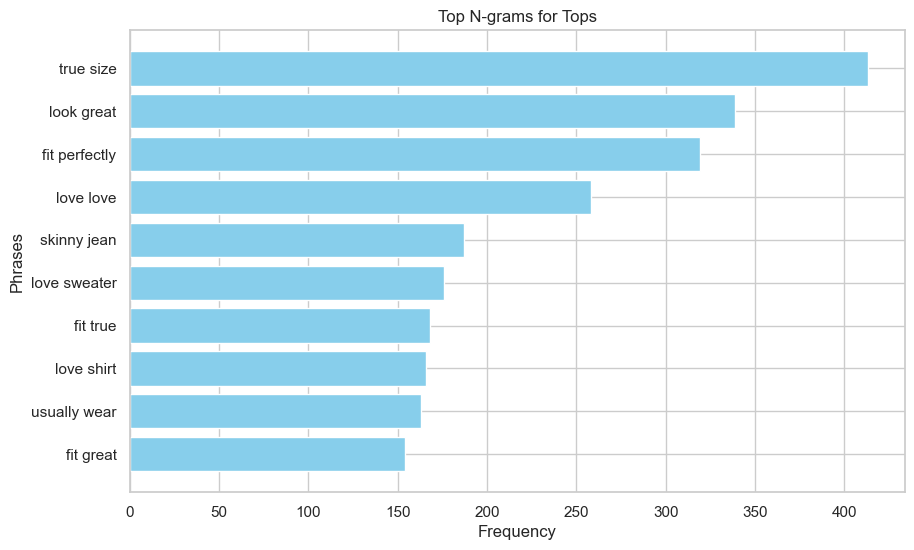

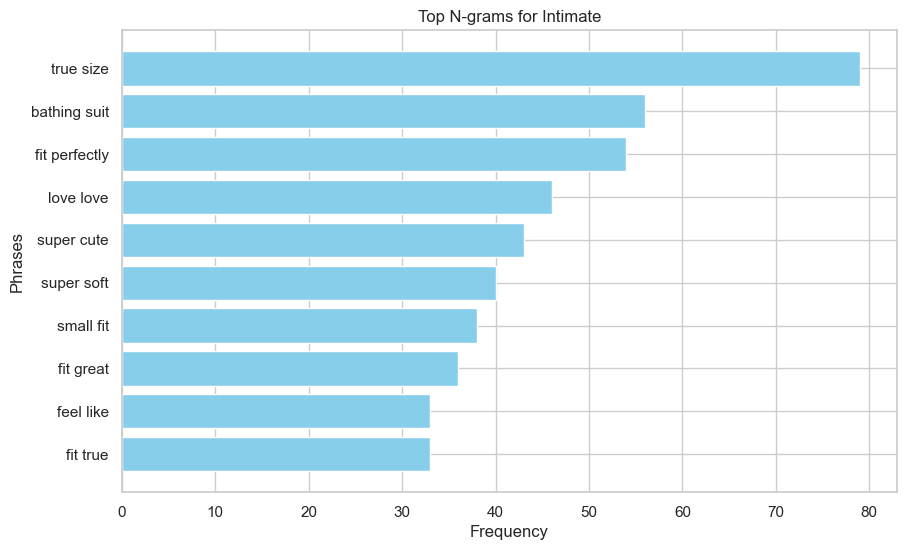

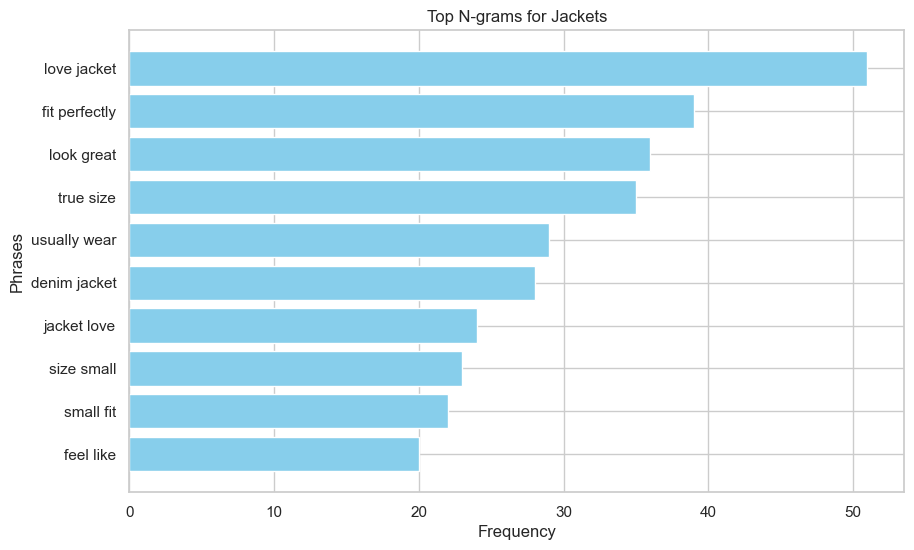

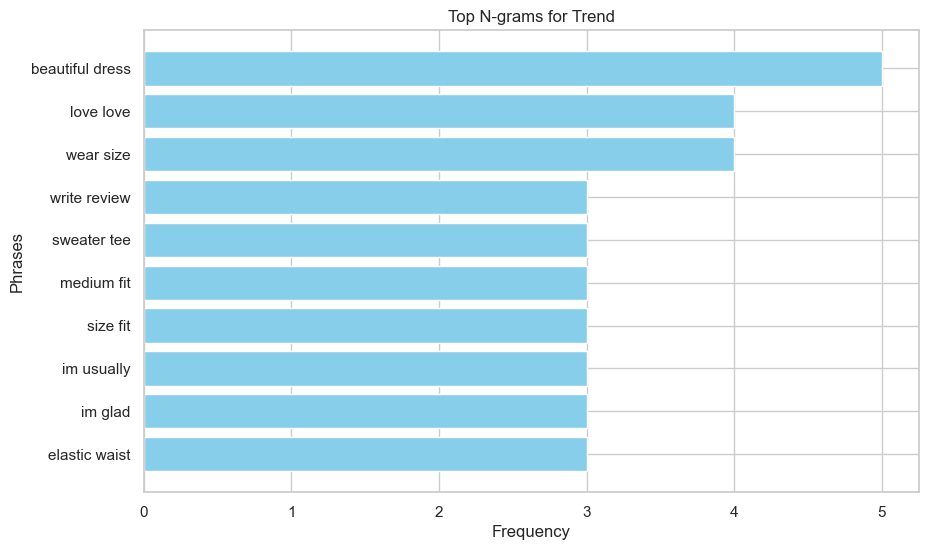

In [69]:
types = High_Ratings['Type']
processed_reviews = High_Ratings['processed_review']

# Get top bigrams by type
top_bigrams_by_type = get_top_ngrams_by_type(processed_reviews, types, n=2)

# Plotting by Type
plot_ngrams(top_bigrams_by_type)

Based on the Bigram analysis:

Working:
* For `Dresses`:
    * Beautiful
    * True Size
* For `Tops`:
    * True size
    * Sweater is good
* For `Intimate`:
    * Super cute
    * True size
    * Bathing suit
* For `Bottom`:
    * Skirts, Pants, Jeans are the most loved items
    * Fit perfectly
* For `Jackets`:
    * Denim jacket is good
    * Fit perfectly
    * Small fit
* For `Trend`:
    * Sweater
    * Elastic waist
    * FIt perfectly


Conclusion:
This comfirms our previous assumption, most of the customers are mentioning the size fit perfectly, except for Jacket there might be some product that has sizing issues(might be bigger or smaller compare to generic brands).

Size issues with lower ratings should be improved by additional assistance on the size.

<a id='Conclusion'></a>
### Conclusion
Overall, customers had postive sentiment towards products, Some low ratings with postive sentiment might suggest sarcasism. Age was not a major factor for how products were rated.

* Pain Points:
    * Sizing issues are a major complaint for both lower and neutral ratings. Customers often mentioned that while they loved the product, the sizes tend to run either too small or too big. To address this, additional assistance in helping customers find the right size is necessary.
* What's Working:
    * Product design
    * Size design
    * Material used for Intimate products
    * Skirts, Pants, Jeans
* What's not Working:
    * Quality-related issues with certain products:
	    * Torsos of some dresses in the intimate products section are too long.
	    * Poor quality of jackets.
